## Detect straight lines using Hough Transform

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
362


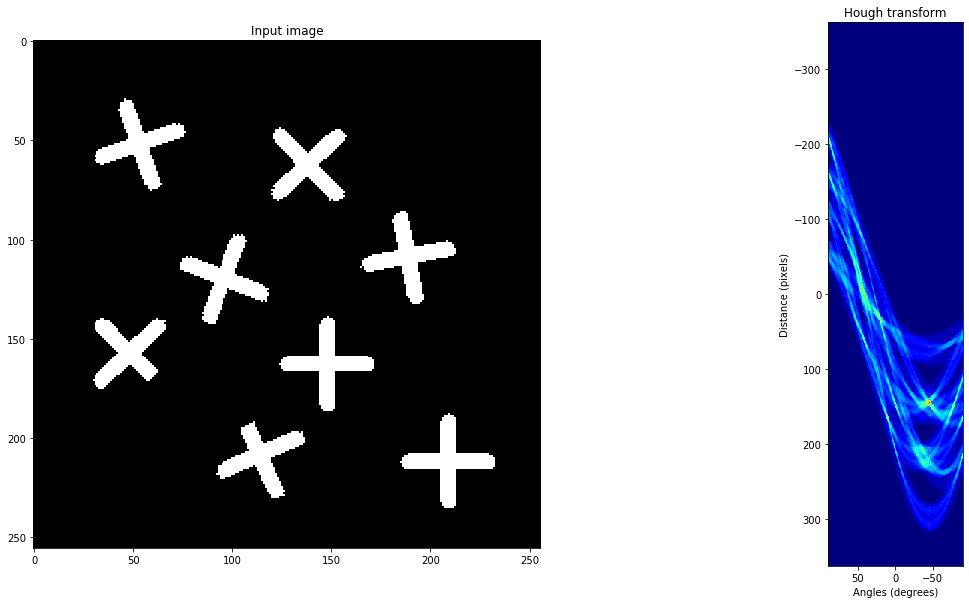

In [2]:
import numpy as np
import imageio
import math

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)


def hough_line(img, angle_step=1, lines_are_white=True, value_threshold=5):
    ################################################################################
    # Hough transform for lines
    #
    # Input:
    # img - 2D binary image with nonzeros representing edges
    # angle_step - Spacing between angles to use every n-th angle
    #             between -90 and 90 degrees. Default step is 1.
    # lines_are_white - boolean indicating whether lines to be detected are white
    # value_threshold - Pixel values above or below the value_threshold are edges
    #
    # Returns:
    # accumulator - 2D array of the hough transform accumulator
    # theta - array of angles used in computation, in radians.
    # rhos - array of rho values. Max size is 2 times the diagonal
    #       distance of the input image.
    ################################################################################
    
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    print(diag_len)
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    # (row, col) indexes to edges
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos


def show_hough_line(img, accumulator, thetas, rhos, save_path=None):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1,2, figsize=(20, 10))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    # plt.axis('off')
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()


if __name__ == '__main__':
    imgpath = 'binary_crosses.png'
    img = imageio.imread(imgpath)
    print(img)
    if img.ndim == 3:
        img = rgb2gray(img)
    accumulator, thetas, rhos = hough_line(img)
    show_hough_line(img, accumulator, thetas, rhos,  save_path='output.png')
